In [1]:
import mmcv
import mmengine
import matplotlib.pyplot as plt
from mmdet.apis import init_detector
import numpy as np
import cv2
import mmdet
import mmyolo
import os
import matplotlib.patches as patches
from evaluation_utils import get_annotation, get_gt_box, detect, visulize_predictions


print('mmcv', mmcv.__version__)
print('mmengine', mmengine.__version__)
print('mmdet', mmdet.__version__)
print('mmyolo', mmyolo.__version__)
%pwd

/data1/anaconda3/envs/mmyolo/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/data1/anaconda3/envs/mmyolo/lib/python3.10/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/data1/anaconda3/envs/mmyolo/lib/python3.10/site-packages/torc

mmcv 2.0.1
mmengine 0.10.4
mmdet 3.3.0
mmyolo 0.6.0


'/data1/zhengyj/mmyolo'

#### Visulizing Functions

#### Test Set up

In [2]:
img_dir = './datasets/beluga/images'
ann_test_sam = './datasets/beluga/annotations/split_sam_BUF_7/test.json'
ann_test_box = './datasets/beluga/annotations/split_box_BUF_7/test.json'

annotation_sam, name2index_sam = get_annotation(ann_test_sam)

img_names = [
    '22JUL31174054-P3DS_R2C2-050169967010_01_P001_49_20.png',
    '21SEP07162703-P3DS_R07C1-014413001050_01_P001_14_15.png',
    '21SEP07162703-P3DS_R06C2-014413001050_01_P001_24_5.png',
    '22JUL31174054-P3DS_R2C1-050169967010_01_P001_37_46.png'
]

In [3]:
det_config_file = './configs_beluga/yolov8_s_b24-100e.py'
det_checkpoint_file_sam = './checkpoints/YOLO-SAM.pth'

det_model = init_detector(det_config_file, det_checkpoint_file_sam)
det_model.cfg['model']['test_cfg']['score_thr'] = 0.15

inter_class_nms_thr = 0.4

Loads checkpoint by local backend from path: ./checkpoints/YOLO-SAM.pth


#### Visualize single model

22JUL31174054-P3DS_R2C2-050169967010_01_P001_49_20.png


/data1/anaconda3/envs/mmyolo/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


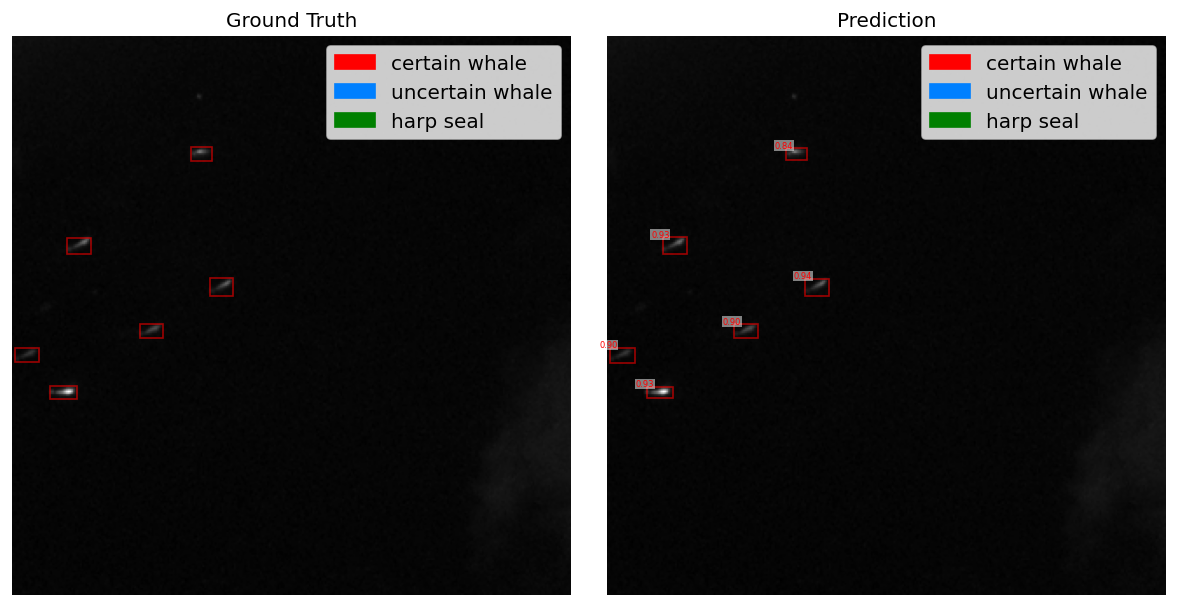

----------
21SEP07162703-P3DS_R07C1-014413001050_01_P001_14_15.png


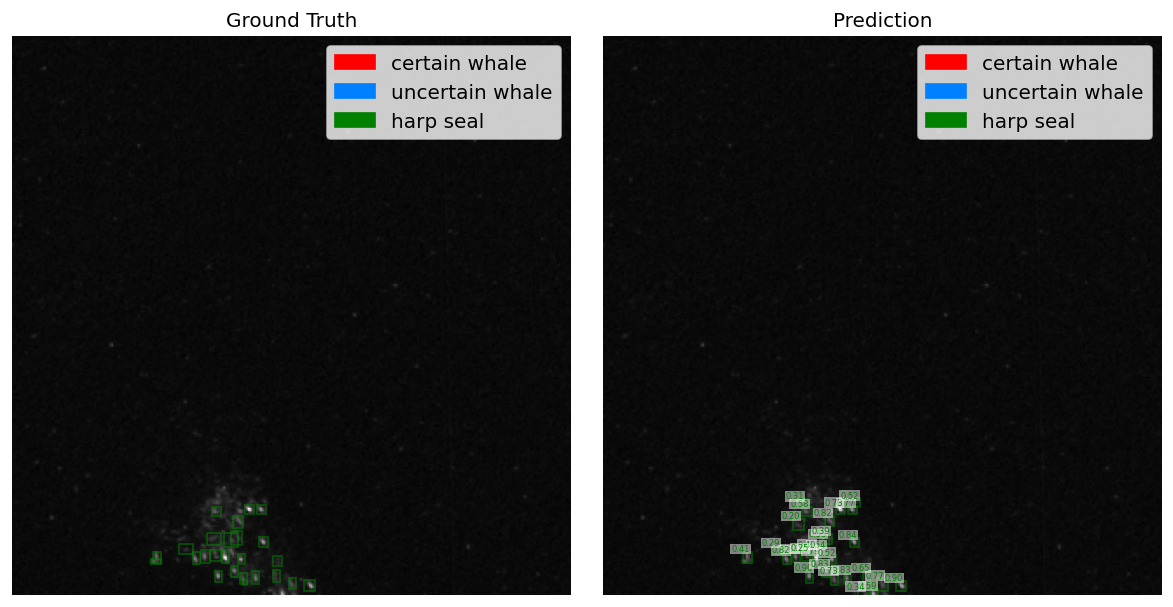

----------
21SEP07162703-P3DS_R06C2-014413001050_01_P001_24_5.png


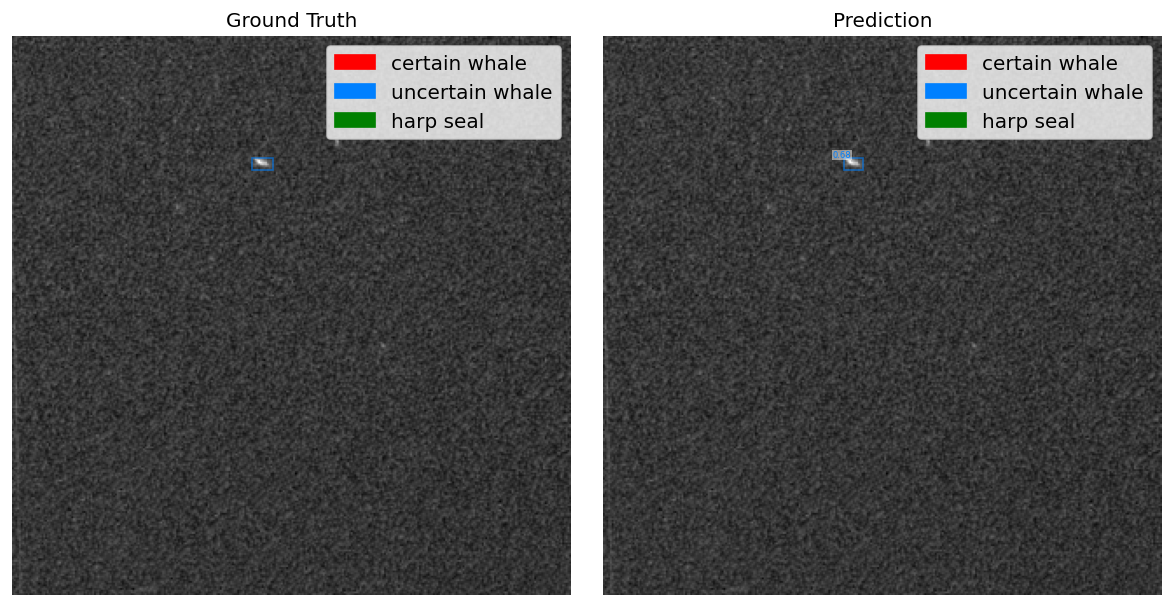

----------
22JUL31174054-P3DS_R2C1-050169967010_01_P001_37_46.png


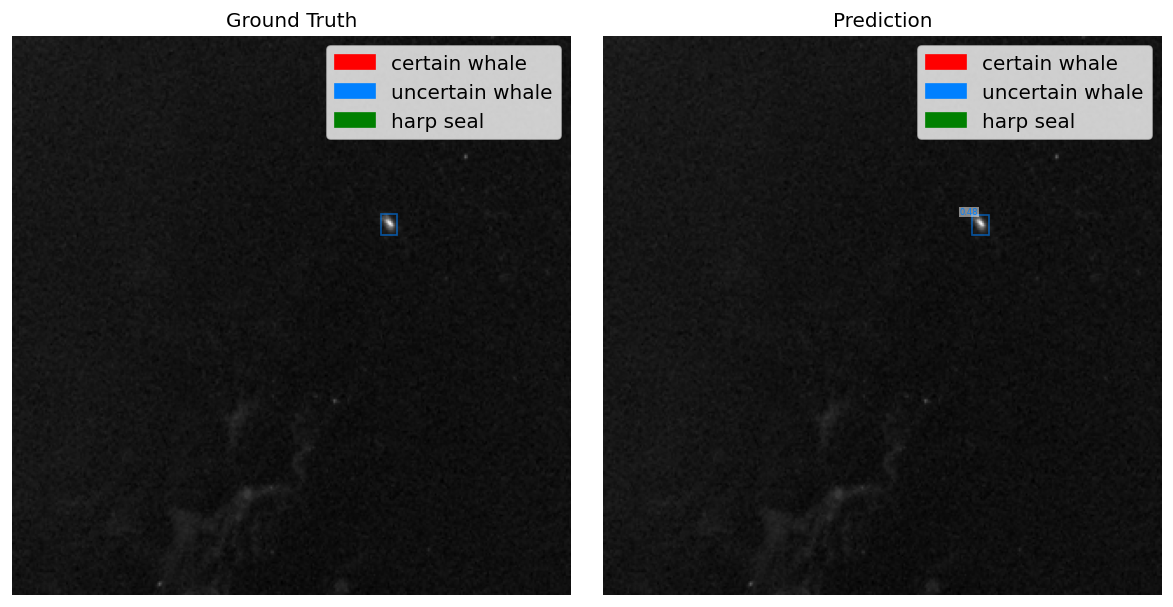

----------


In [4]:
for cnt, filename in enumerate(img_names):
    print(filename)
    gt_bboxes, gt_labels = get_gt_box(annotation_sam, name2index_sam, filename)    # gt_labels begin with 0
    img_path = os.path.join(img_dir, filename)
    img = cv2.imread(img_path)
    bboxes, scores, labels = detect(det_model, img, inter_class_nms_thr=inter_class_nms_thr)
    visulize_predictions(img, bboxes, gt_bboxes, labels, gt_labels, scores, dpi=120)
    print('-'*10)
    if cnt > 20:
        break